<a href="https://colab.research.google.com/github/Mosaraf15/Data-Manipulation-with-pandas/blob/main/04_Creating_and_Visualizing_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####**Md.Mosaraf Hossain Khan**
Chittagang, Bangladesh


#**Creating and Visualizing DataFrames**



#Visualizing your data

####**Which avocado size is most popular?**

Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

**Quistion**
1. Print the head of the avocados dataset. What columns are available?
2. For each avocado size group, calculate the total number sold, storing as nb_sold_by_size.
3. Create a bar plot of the number of avocados sold by size.
4. Show the plot.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import pandas using the alias pd
import pandas as pd

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt


In [3]:
# reading a csv file
avocados = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/05 Data Manipulation with pandas/Data/avoplotto.pkl')

# Look at the first few rows of data
#print(avocados.head())
avocados.head()


,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [4]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

display(nb_sold_by_size.head())  #Extra

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

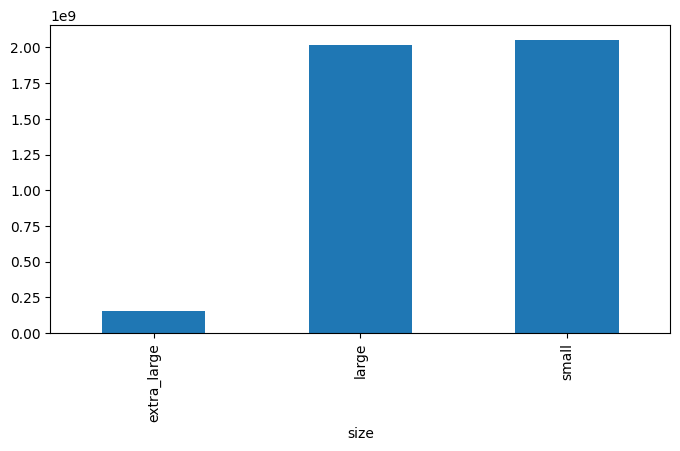

In [5]:
plt.figure(figsize=(8,4))

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

###**Changes in sales over time**
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.


1. Get the total number of avocados sold on each date. The DataFrame has two rows for each date—one for organic, and one for conventional. Save this as nb_sold_by_date.
2. Create a line plot of the number of avocados sold.
3. Show the plot.

In [8]:
# Get the total number of avocados sold on each date
nb_sold_by_date = nb_sold_by_size = avocados.groupby('date')['nb_sold'].sum()

print(nb_sold_by_date)

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64


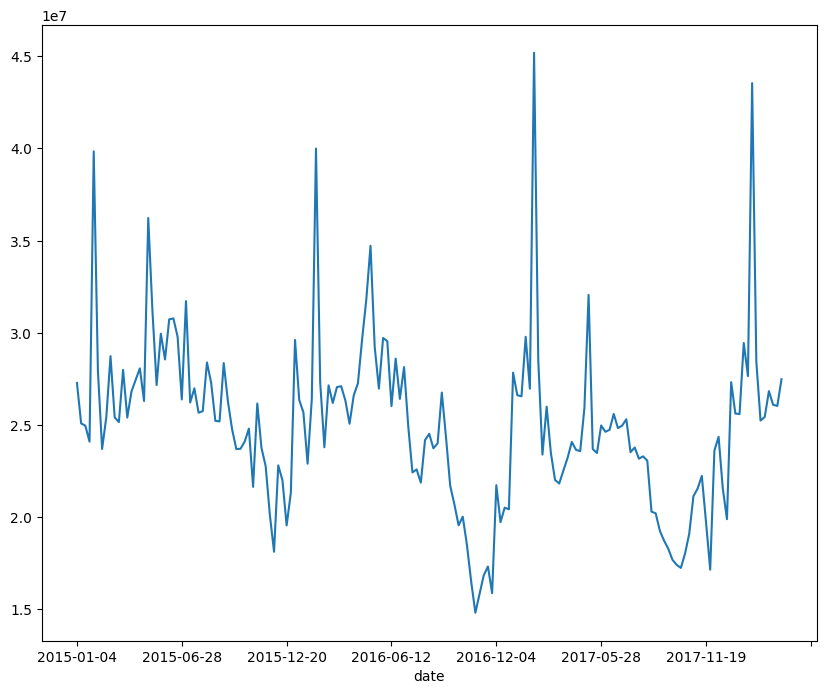

In [9]:
plt.figure(figsize=(10,8))

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')

# Show the plot
plt.show()

###**Avocado supply and demand**
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.


1. Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis. Title it "Number of avocados sold vs. average price".
2. Show the plot.

<Figure size 2000x1600 with 0 Axes>

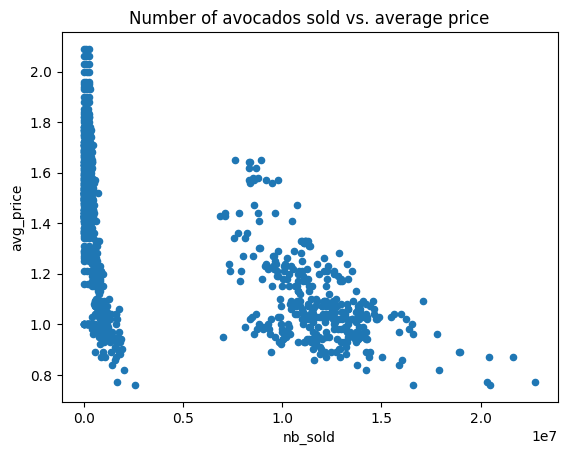

In [10]:
plt.figure(figsize=(20,16))

# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter',title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

###**Price of conventional vs. organic avocados**
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

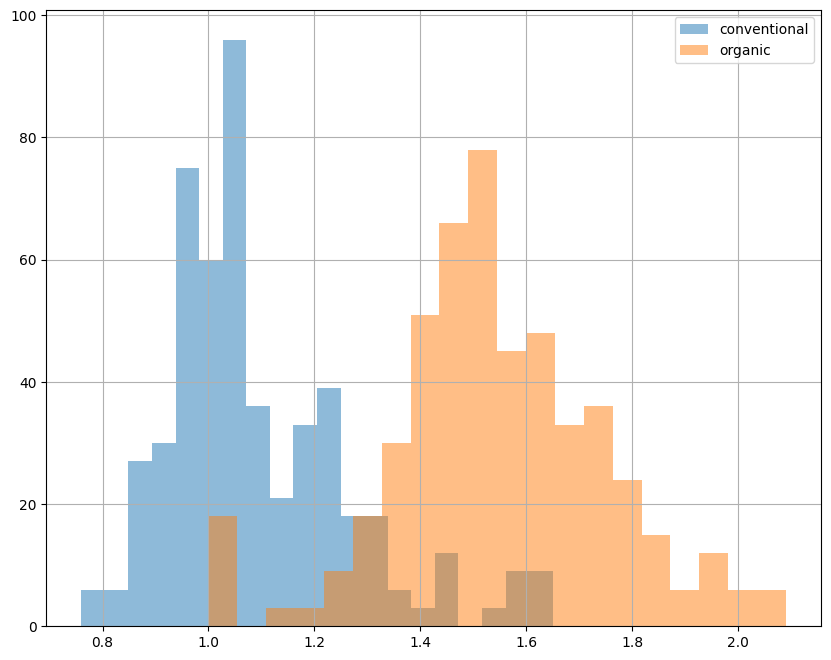

In [11]:
plt.figure(figsize=(10,8))

# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(bins=20, alpha=0.5)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(bins=20, alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

#**Missing values**
##Finding missing values
**.isna(), .any()**

###**Finding missing values**
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

**Instructions**

1. Print a DataFrame that shows whether each value in avocados_2016 is missing or not.
2. Print a summary that shows whether any value in each column is missing or not.
3. Create a bar plot of the total number of missing values in each column.

In [13]:
avocados_2016=pd.read_csv('/content/drive/MyDrive/Data-Science/Data Camp/05 Data Manipulation with pandas/Data/data-manipulation-with-pandas/avocados_2016.csv')

avocados_2016.head()

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,42729.0,1.00,30290000.0,9255000.0,10280000.0,542000.0,10210000.0,7710000.0,2417000.0,81101.22
1,42722.0,0.96,29580000.0,9394000.0,10340000.0,427900.0,9423000.0,6970000.0,2358000.0,94011.78
2,42715.0,0.98,30090000.0,9010000.0,NaN,403000.0,10710000.0,8149000.0,2490000.0,73342.82
3,42708.0,1.00,31620000.0,11040000.0,9909000.0,428000.0,10240000.0,7187000.0,2989000.0,65350.63
4,42701.0,1.21,22920000.0,7891000.0,7337000.0,NaN,7350000.0,5691000.0,1610000.0,48623.28


In [14]:
# Check individual values for missing values
#print(avocados_2016.isna())

display(avocados_2016.isna())

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [17]:
# Check each column for missing values
print(avocados_2016.isna().any())


date               False
avg_price          False
total_sold         False
small_sold          True
large_sold          True
xl_sold             True
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


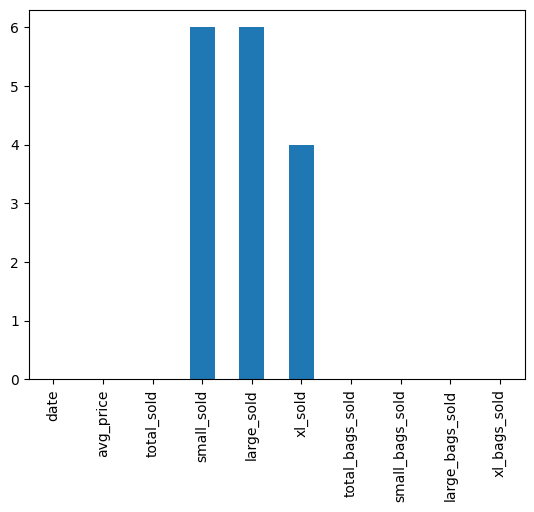

In [18]:
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

###**Removing missing values**
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

**Instructions**

1. Remove the rows of avocados_2016 that contain missing values and store the remaining rows in avocados_complete.
2. Verify that all missing values have been removed from avocados_complete. Calculate each column that has NAs and print.

In [19]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


###**Replacing missing values**
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

**dogs[["height_cm", "weight_kg"]].hist()**

**Instructions** 2/2

1. Replace the missing values of avocados_2016 with 0s and store the result as avocados_filled.
2. Create a histogram of the cols_with_missing columns of avocados_filled.

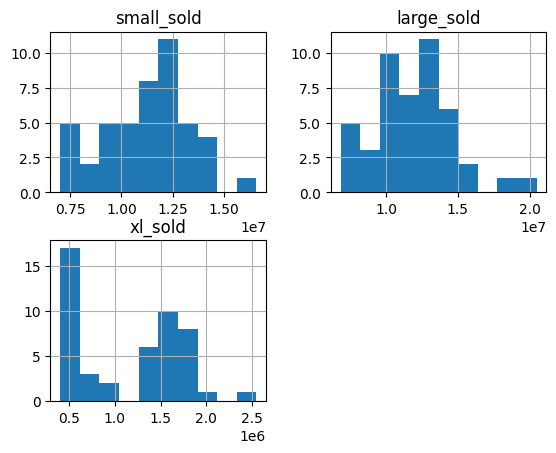

In [20]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()



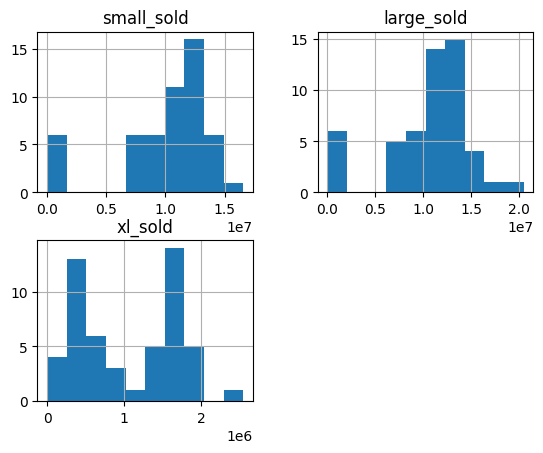

In [21]:
# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

##Creating DataFrames

###**List of dictionaries**
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

date	small_sold	large_sold
"2019-11-03"	10376832	7835071
"2019-11-10"	10717154	8561348

**Instructions**

1. Create a list of dictionaries with the new data called avocados_list.
2. Convert the list into a DataFrame called avocados_2019.
3. Print your new DataFrame.

In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

display(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


###**Dictionary of lists**
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

**Instructions**
1. Create a dictionary of lists with the new data called avocados_dict.
2. Convert the dictionary to a DataFrame called avocados_2019.
3. Print your new DataFrame.

In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

display(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


,date,small_sold,large_sold
0,2019-11-17,10859987,7674135
1,2019-12-01,9291631,6238096


#**Reading and writing CSVs**

###**CSV to DataFrame**
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

**Instructions** 4/4

1. Print airline_totals to see the results of your manipulations.

In [23]:
# From previous steps
airline_bumping = pd.read_csv("/content/drive/MyDrive/Data-Science/Data Camp/05 Data Manipulation with pandas/Data/data-manipulation-with-pandas/airline_bumping.csv")
print(airline_bumping.head())

display(airline_bumping.head())

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


,airline,year,nb_bumped,total_passengers
0,DELTA AIR LINES,2017,679,99796155
1,VIRGIN AMERICA,2017,165,6090029
2,JETBLUE AIRWAYS,2017,1475,27255038
3,UNITED AIRLINES,2017,2067,70030765
4,HAWAIIAN AIRLINES,2017,92,8422734


In [24]:
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print (airline_totals)

display(airline_totals.head())

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
ALASKA AIRLINES           1392          36543121       0.380920
AMERICAN AIRLINES        11115         197365225       0.563169
DELTA AIR LINES           1591         197033215       0.080748
EXPRESSJET AIRLINES       3326          27858678       1.193883
FRONTIER AIRLINES         1228          22954995       0.534960
HAWAIIAN AIRLINES          122          16577572       0.073593
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
SOUTHWEST AIRLINES       18585         228142036       0.814624
SPIRIT AIRLINES           2920          32304571       0.903897
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365


,nb_bumped,total_passengers,bumps_per_10k
airline,,,
ALASKA AIRLINES,1392,36543121,0.380920
AMERICAN AIRLINES,11115,197365225,0.563169
DELTA AIR LINES,1591,197033215,0.080748
EXPRESSJET AIRLINES,3326,27858678,1.193883
FRONTIER AIRLINES,1228,22954995,0.534960


###**DataFrame to CSV**
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

**Instructions**

1. Sort airline_totals by the values of bumps_per_10k from highest to lowest, storing as airline_totals_sorted.
2. Print your sorted DataFrame.
3. Save the sorted DataFrame as a CSV called "airline_totals_sorted.csv".



In [25]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k', ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

display(airline_totals_sorted)

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
EXPRESSJET AIRLINES       3326          27858678       1.193883
SPIRIT AIRLINES           2920          32304571       0.903897
SOUTHWEST AIRLINES       18585         228142036       0.814624
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
AMERICAN AIRLINES        11115         197365225       0.563169
FRONTIER AIRLINES         1228          22954995       0.534960
ALASKA AIRLINES           1392          36543121       0.380920
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365
DELTA AIR LINES           1591         197033215       0.080748
HAWAIIAN AIRLINES          122          16577572       0.073593


,nb_bumped,total_passengers,bumps_per_10k
airline,,,
EXPRESSJET AIRLINES,3326,27858678,1.193883
SPIRIT AIRLINES,2920,32304571,0.903897
SOUTHWEST AIRLINES,18585,228142036,0.814624
JETBLUE AIRWAYS,3615,53245866,0.678926
SKYWEST AIRLINES,3094,47091737,0.657015
AMERICAN AIRLINES,11115,197365225,0.563169
FRONTIER AIRLINES,1228,22954995,0.534960
ALASKA AIRLINES,1392,36543121,0.380920
UNITED AIRLINES,4941,134468897,0.367446


In [ ]:
# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")